In [1]:
import pandas as pd

# Merging with Yulian Data

In [2]:
dang_speech_data = pd.read_csv("dang_speech.csv")
dang_speech_yulian = pd.read_csv("dang_speech_yulian.csv", encoding="latin1")

In [3]:
dang_speech_data = dang_speech_data[['Tweet Text', 'KS', 'KH', 'DH', 'TDH', 'SWA', 'LO', 'AK']].fillna(0).rename(columns={"Tweet Text": "Tweet"})
display(dang_speech_data.head())
print(dang_speech_data.shape)

,Tweet,KS,KH,DH,TDH,SWA,LO,AK
0,Sudah bodoh buat hoaks pula 👇🏻 https://t.co/qK...,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,"Penggugatnya berarti bodoh , kalau mau cari ja...",0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,"Jangan arogan cul @PDI_Perjuangan , fokus saja...",0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,RT @ChusnulCh__: Si b4nci gagap caper Iagi.😂😝\...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,"Kadrot , kadrun peot 👇🏻 https://t.co/04vLXm1WBF",0.0,0.0,1.0,0.0,0.0,0.0,0.0


(184, 8)


In [4]:
display(dang_speech_yulian.head())
print(dang_speech_yulian.shape)

display(dang_speech_yulian[['KS', 'KH', 'DH', 'TDH', 'SWA', 'LO', 'AK']].sum())

,Tweet,KS,KH,DH,TDH,SWA,LO,AK
0,Ini pasti salah Jokowi Ahok dan kafir-kafir at...,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,@fahmiabuazzam1 biar aja biar tai nya kena bap...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,RT @Lupuz0503: Prestasi Ahok Selain mjadi mafi...,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,Ulama Kompak Nyatakan Haram Pemimpin Kafir Pil...,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,KAU PENDIKAN TINGGI TAPI BODOH....GK ADA LARAN...,1.0,0.0,0.0,1.0,0.0,0.0,0.0


(900, 8)


KS     419.0
KH     111.0
DH     320.0
TDH    670.0
SWA      6.0
LO       5.0
AK     112.0
dtype: float64

In [5]:
dang_speech_merge = pd.concat([dang_speech_data, dang_speech_yulian], ignore_index=True)
dang_speech_merge.head()

,Tweet,KS,KH,DH,TDH,SWA,LO,AK
0,Sudah bodoh buat hoaks pula 👇🏻 https://t.co/qK...,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,"Penggugatnya berarti bodoh , kalau mau cari ja...",0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,"Jangan arogan cul @PDI_Perjuangan , fokus saja...",0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,RT @ChusnulCh__: Si b4nci gagap caper Iagi.😂😝\...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,"Kadrot , kadrun peot 👇🏻 https://t.co/04vLXm1WBF",0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
display(dang_speech_merge[['KS', 'KH', 'DH', 'TDH', 'SWA', 'LO', 'AK']].sum())
print(dang_speech_merge.shape)

KS     477.0
KH     118.0
DH     398.0
TDH    801.0
SWA     11.0
LO       5.0
AK     117.0
dtype: float64

(1084, 8)


In [7]:
dang_speech_merge.to_csv("dang_speech_merge.csv")

# Make Model

## Visualization

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

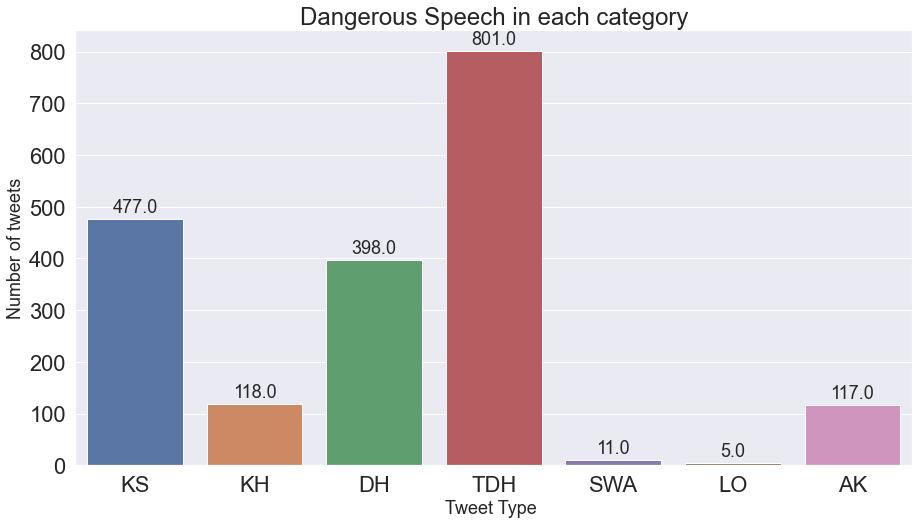

In [9]:
categories = list(dang_speech_merge.columns.values)[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
labels = dang_speech_merge.iloc[:,1:].sum().values
ax=sns.barplot(x=categories, y=labels)

plt.title("Dangerous Speech in each category", fontsize=24)
plt.ylabel('Number of tweets', fontsize=18)
plt.xlabel('Tweet Type ', fontsize=18)#adding the text labels

rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

## Preprocessing

In [11]:
from nlp_id.tokenizer import Tokenizer
from nlp_id.lemmatizer import Lemmatizer 
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

ImportError: cannot import name 'Sequence' from 'collections' (c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\collections\__init__.py)

In [ ]:
# Import kamus bahasa slang
slang_dict = pd.read_csv('https://raw.githubusercontent.com/kelvin2401/stki/main/slang.txt', delimiter = ";")
dict_slang = dict(slang_dict.values)
print (slang_dict)